# Analyzing the Top 1000 IMDB Movies and TV Shows Dataset

### The main goal of this analysis to gain some usefull explorated information from this dataset.

### CC: @[Yousef.Salah](https://github.com/Yousef-Salah)

## Importing required libraries to get started

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = './imdb_top_1000.csv'

data = pd.read_csv(file_path)

from the below cells, where I am displaying dataset features (columns) and the first exists sample in dataset, I did not see unnecessary features, because each one of them give me an useful information about this observation.

In [3]:
data.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [4]:
data.head(1)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


### Handling Missing Data

In [5]:
data.isna().any()   # check if there is a features contains missing values

Poster_Link      False
Series_Title     False
Released_Year    False
Certificate       True
Runtime          False
Genre            False
IMDB_Rating      False
Overview         False
Meta_score        True
Director         False
Star1            False
Star2            False
Star3            False
Star4            False
No_of_Votes      False
Gross             True
dtype: bool

In [6]:
data.isna().sum() / data.shape[0]   # how many the percintage of missing values in each column 

Poster_Link      0.000
Series_Title     0.000
Released_Year    0.000
Certificate      0.101
Runtime          0.000
Genre            0.000
IMDB_Rating      0.000
Overview         0.000
Meta_score       0.157
Director         0.000
Star1            0.000
Star2            0.000
Star3            0.000
Star4            0.000
No_of_Votes      0.000
Gross            0.169
dtype: float64

In [7]:
# dropping Certificate feature because I did not see any benifit of keeping it 
data.drop('Certificate', axis=1, inplace=True)

# I tried to fill missing values of Meta_score and Gross using knn algorithm, but there is no enough time to do that now ^_^
# So, sense these dtypes are numeric, I will use mean to fill missing values in these features
mete_score_mean = data.Meta_score.mean()
data['Gross'] = data['Gross'].str.replace(',', '').astype('float')
gross_mean = data.Gross.mean()

data.Meta_score.fillna(mete_score_mean, inplace=True)
data.Gross.fillna(gross_mean, inplace=True)

In [8]:
data.isna().any().any()     # there is no missing values in this dataset now.

False

### The Most Popular Genre of Movies and TV shows 

In [9]:
most_popular_genre = data.groupby('Genre').size().sort_values(ascending=False).index[0]
print(f'The Most Popular Genre of Movies and TV shows is {most_popular_genre}')

The Most Popular Genre of Movies and TV shows is Drama


In [10]:
genre_stats = data.groupby('Genre').size().to_frame()
genre_stats

,0
Genre,
"Action, Adventure",5
"Action, Adventure, Biography",1
"Action, Adventure, Comedy",10
"Action, Adventure, Crime",1
"Action, Adventure, Drama",14
...,...
"Mystery, Romance, Thriller",1
"Mystery, Sci-Fi, Thriller",2
"Mystery, Thriller",9


#### 10 Most Popular Genre

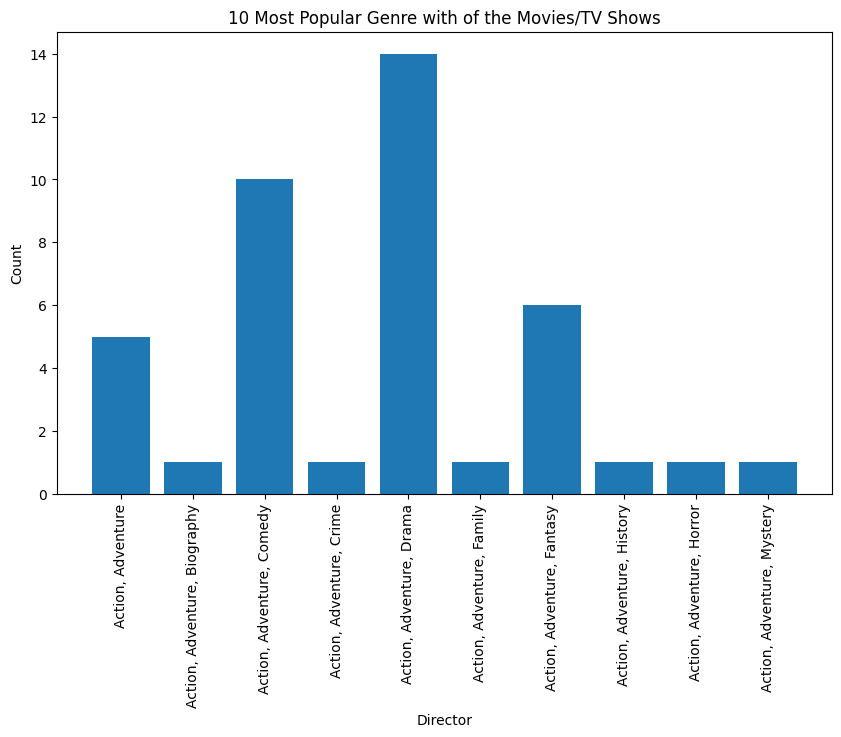

In [11]:
plt.figure(figsize=(10, 6))

limit = 10

plt.bar(genre_stats.index[:limit], genre_stats.values.reshape([len(genre_stats.values)])[:limit])
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('10 Most Popular Genre with of the Movies/TV Shows')
plt.xticks(rotation=90)

plt.show()


### Identify the director with the most top-rated movies/TV shows by creating a new dataframe containing the count of movies/TV shows directed by each director using pandas.

In [12]:
top_rated_movies_director = data.sort_values(by='IMDB_Rating', ascending=False)
top_rated_movies_director = top_rated_movies_director.groupby('Director').size().to_frame()
top_rated_movies_director.rename(columns={0: 'count'}, inplace=True)
top_rated_movies_director.reset_index(inplace=True)
top_rated_movies_director

,Director,count
0,Aamir Khan,1
1,Aaron Sorkin,1
2,Abdellatif Kechiche,1
3,Abhishek Chaubey,1
4,Abhishek Kapoor,1
...,...,...
543,Zack Snyder,2
544,Zaza Urushadze,1
545,Zoya Akhtar,2
546,Çagan Irmak,1


I will draw just for top 50 *directors*

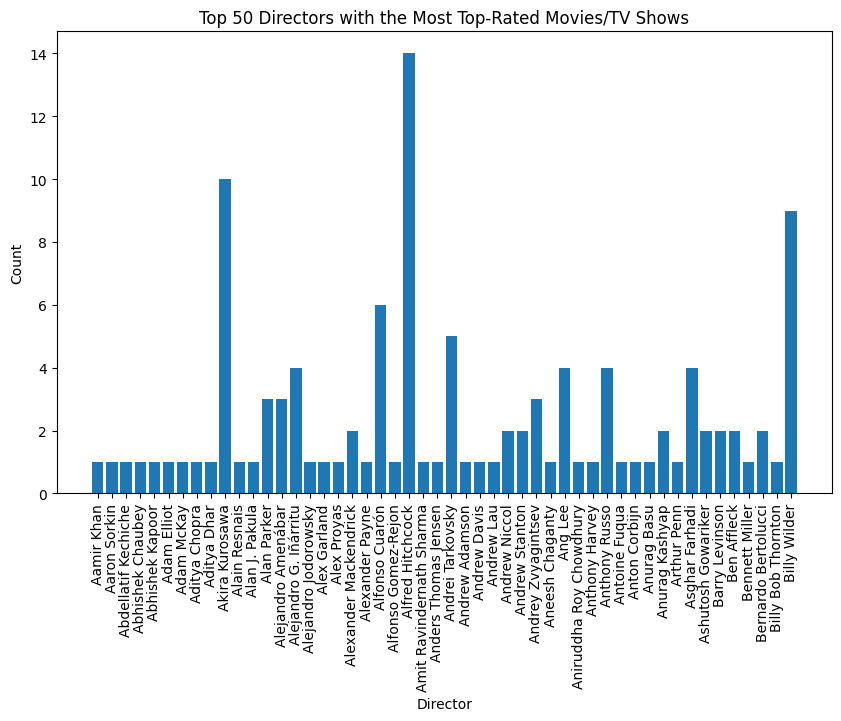

In [13]:
plt.figure(figsize=(10, 6))

limit = 50

plt.bar(top_rated_movies_director['Director'][:limit], top_rated_movies_director['count'][:limit])
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Top 50 Directors with the Most Top-Rated Movies/TV Shows')
plt.xticks(rotation=90)
plt.show()

# Anlysis and Insights Report

## Introduction 

The purpose of this analysis is to find and discover usefull informations about 1000 Movies/TV's listed on IMDB website.

We will cover and explore various perspectives, such as IMDB Rating, generes, directors and more, to gain insights into these listed Movies.

## Data Collection 

The dataset is already collected from IMDB wevsite,and it's free on Koggle

[Dataset Link](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows)

## Preprocessing: Data Cleaning 

Before performing any operation on data, or extract any information from collected data, we have to ensure that data is clean, which means there is no missing values, no incosistant values by filling them with a prety good ones, and no unnecessary features by dropping these features.

In this dataset I just handle the missing values and unnecessary features, and I leave incosistant values issue as it ( if exists ), because I don't realy know what is the range on acceptable values for each feature.


## Analysis and Insights

During our analysis of the IMDb dataset which consists of 1000 Movies/TV's, we found some extremely interesting insights. We discovered which genre was the most popular among the top rated Movies/TV's programs, whic is the `Action, Advanture` giving us an idea of what types of movies and TV shows viewers prefer. Additionally, we identified the director who had directed the most top rated Movies/TV's programs, showing us who has been the most successful ones. These findings help us understand the popular genres and notable directors in the IMDb dataset more clearly.








## Conlusion
In conclusion, our analysis of the top 1000 IMDb movies provided valuable insights into the ratings, genres, and directors of these highly rated films/movies. By examining these perspectives, we gained a better understanding of the characteristics and preferences of IMDb users. This analysis contributes to our knowledge of the film industry and its impact on popular culture and impact our next step decisons.

